<a href="https://colab.research.google.com/github/subair99/ML_Zoomcamp_2022/blob/main/ML_Zoomcamp_Session__7_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

### Data preparation

In [ ]:
data = 'ML_Zoomcamp_Session_#7_data.csv'
df = pd.read_csv(data)

In [ ]:
df.columns = df.columns.str.lower()

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df = df[df.status != 'unk'].reset_index(drop=True)

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_test['status']

In [ ]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

### Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

### XGBoost

Note:We removed feature names


It was:

features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)


Now it's:

dtrain = xgb.DMatrix(X_train, label=y_train)

In [ ]:
X_train[0]

array([4.80e+01, 1.00e+03, 3.00e+03, 0.00e+00, 6.00e+01, 0.00e+00,
       0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.10e+02, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.46e+03, 1.00e+00, 0.00e+00, 2.20e+01, 4.80e+01])

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### BentoML

In [ ]:
import bentoml

In [ ]:
bentoml.xgboost.save_model(
    'credit_risk_model',
    model,
    custom_objects={
        'dictVectorizer': dv
    })

Model(tag="credit_risk_model:3bc6k52sfomfp4a7", path="C:\Users\a\bentoml\models\credit_risk_model\3bc6k52sfomfp4a7\")

### Test

In [ ]:
import json

In [ ]:
request = df_test.iloc[0].to_dict()
print(json.dumps(request, indent=2))

In [ ]:
{
  "seniority": 3,
  "home": "owner",
  "time": 36,
  "age": 26,
  "marital": "single",
  "records": "no",
  "job": "freelance",
  "expenses": 35,
  "income": 0,
  "assets": 60000,
  "debt": 3000,
  "amount": 800,
  "price": 1000
}

### HOMEWORK
Note: sometimes your answer might not match one of the options exactly. That's fine. Select the option that's closest to your solution.

The goal of this homework is to familiarize you with BentoML and how to build and test an ML production service.

### Background
You are a new recruit at ACME corp. Your manager is emailing you about your first assignment.

### Email from your manager
Good morning recruit! It's good to have you here! I have an assignment for you. I have a data scientist that's built a credit risk model in a jupyter notebook. I need you to run the notebook and save the model with BentoML and see how big the model is. If it's greater than a certain size, I'm going to have to request additional resources from our infra team. Please let me know how big it is.

Thanks,

Mr McManager

### Question 1
1. Install BentoML
2. What's the version of BentoML you installed?
3. Use --version to find out

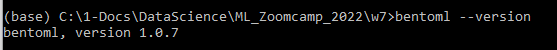

Answer: 1.0.7

### Question 2
Run the notebook which contains the xgboost model from module 6 i.e previous module and save the xgboost model with BentoML. To make it easier for you we have prepared this notebook.

How big approximately is the saved BentoML model? Size can slightly vary depending on your local development environment. Choose the size closest to your model.

1. 924kb
2. 724kb
3. 114kb
4. 8kb

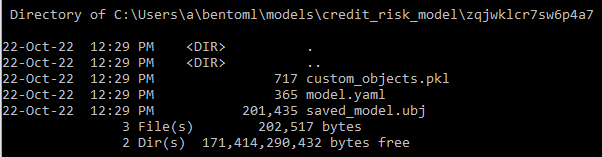

Answer: 114kb

### Another email from your manager
Great job recruit! Looks like I won't be having to go back to the procurement team. Thanks for the information.

However, I just got word from one of the teams that's using one of our ML services and they're saying our service is "broken" and their trying to blame our model. I looked at the data their sending and it's completely bogus. I don't want them to send bad data to us and blame us for our models. Could you write a pydantic schema for the data that they should be sending? That way next time it will tell them it's their data that's bad and not our model.

Thanks,

Mr McManager

### Question 3
Say you have the following data that you're sending to your service:

    {
      "name": "Tim",
      "age": 37,
      "country": "US",
      "rating": 3.14
    }

What would the pydantic class look like? You can name the class UserProfile.

Answer:

The pydantic model would look like:

class CreditApplication(BaseModel):
	name: str	
	age: int
	country: str
	rating: float

### Email from your CEO
Good morning! I hear you're the one to go to if I need something done well! We've got a new model that a big client needs deployed ASAP. I need you to build a service with it and test it against the old model and make sure that it performs better, otherwise we're going to lose this client. All our hopes are with you!

Thanks,

CEO of Acme Corp

### Question 4
We've prepared a model for you that you can import using:

curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel
bentoml models import coolmodel.bentomodel
What version of scikit-learn was this model trained with?

    1. 1.1.1
    2. 1.1.2
    3. 1.1.3
    4. 1.1.4
    5. 1.1.5

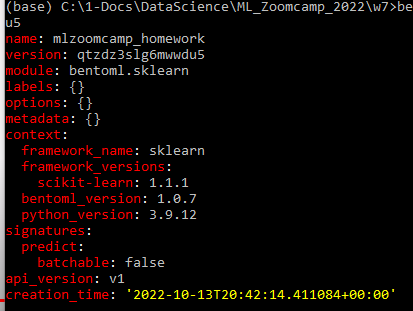

Answer: 1.1.1

### Question 5
Create a bento out of this scikit-learn model. The output type for this endpoint should be NumpyNdarray()

Send this array to the Bento:

    [[6.4,3.5,4.5,1.2]]

You can use curl or the Swagger UI. What value does it return?

    1. 0
    2. 1
    3. 2
    4. 3
    
(Make sure your environment has Scikit-Learn installed)

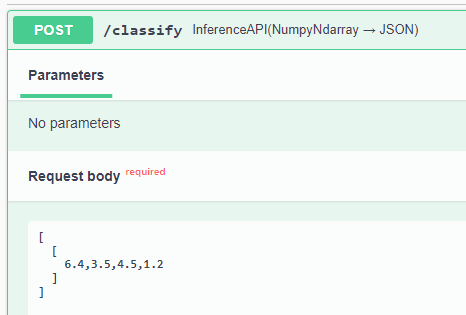


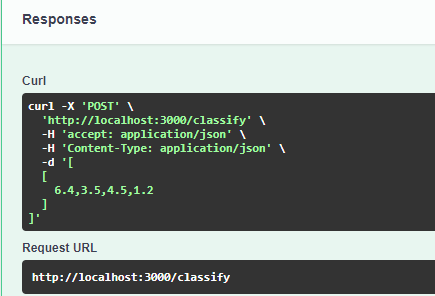


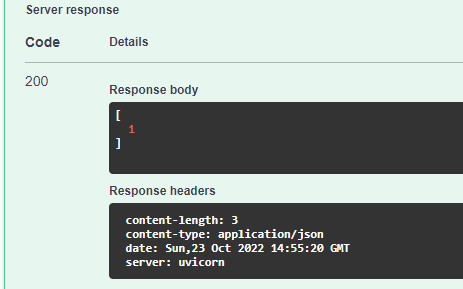

Answer: 1

### Question 6
Ensure to serve your bento with --production for this question

Install locust using:

    pip install locust

Use the following locust file: locustfile.py

Ensure that it is pointed at your bento's endpoint (In case you didn't name your endpoint "classify")

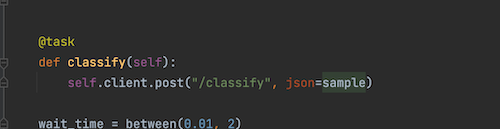

Configure 100 users with ramp time of 10 users per second. Click "Start Swarming" and ensure that it is working.

Now download a second model with this command:

    curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

Or you can download with this link as well: https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

Now import the model:

    bentoml models import coolmodel2.bentomodel
    
Update your bento's runner tag and test with both models. Which model allows more traffic (more throughput) as you ramp up the traffic?

Hint 1: Remember to turn off and turn on your bento service between changing the model tag. Use Ctl-C to close the service in between trials.

Hint 2: Increase the number of concurrent users to see which one has higher throughput

Which model has better performance at higher volumes?

The first model
The second model

Answer: The second model

### Email from marketing
Hello ML person! I hope this email finds you well. I've heard there's this cool new ML model called Stable Diffusion. I hear if you give it a description of a picture it will generate an image. We need a new company logo and I want it to be fierce but also cool, think you could help out?

Thanks,

Mike Marketer